In [1]:
import torch
import torchvision

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cv2

from torchvision import transforms as transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image

In [2]:
df_labels = pd.read_csv('king salmon\labels.csv')
df_labels.head(10)

,Unnamed: 0,Unnamed: 1,ID,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,POSITIVE
0,OC171B/1,OC171B,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,OC171B/2,OC171B,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,OC171B/3,OC171B,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,OC171B/4,OC171B,4,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,OC171B/5,OC171B,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,OC171B/6,OC171B,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,OC171B/7,OC171B,7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
7,OC171B/8,OC171B,8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,OC171B/9,OC171B,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,OC171B/10,OC171B,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [3]:
data = df_labels[['ID', 'POSITIVE']]
data.head(10)

,ID,POSITIVE
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [4]:
labels = data.loc[:, 'POSITIVE'].values
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [5]:
class CustomDataset(Dataset):
    def __init__(self, images_path, images_data=None, transforms=None):
        self.path = images_path
        self.data = images_data
        self.transforms = transforms

    def __getitem__(self, id):
        img_name = self.path + '\\' + str(self.data.loc[id, 'ID']) + '.jpg'

        img = cv2.imread(img_name)
        label = self.data.loc[id, 'POSITIVE']

        if self.transforms:
            img = self.transforms(img)
        if self.data is not None:
            return (img, label)
        else:
            return img
    
    def __len__(self):
        return (len(self.data))

In [6]:
class Resize(object):
    """ Resize anh ve kich thuoc mong muon.
        Args:
            output_size(int, tuple): 1 so nguyen hoac tuple. 
            Neu la so nguyen thi gan canh nho bang output_size, canh lon duoc tinh chinh.
            Neu la tuple thi gan binh thuong.    
    """
    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, images):

        h, w = images.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = int(self.output_size * h / w), self.output_size
            else:
                new_h, new_w = self.output_size, int(self.output_size * w / h)
        else:
            new_h, new_w = self.output_size

        img = cv2.resize(images, (new_w,new_h))

        return img



class ToTensor(object):
    def __call__(self, image):
        image = image.transpose((2, 0, 1))

        return torch.from_numpy(image)



In [11]:
transform = transforms.Compose([
    Resize(512),
    ToTensor()]
)


In [12]:
train_dataset = CustomDataset('king salmon\images', data, transforms=transform)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=8, shuffle=True)

tensor(1)


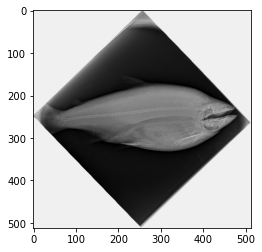

In [13]:
data_iter = iter(train_loader)
# Mini-batch images and labels
images, labels = next(data_iter)


print(labels[0])
# plt.imshow(images[0].view((images[0].shape[1], images[0].shape[2], images[0].shape[0])))
plt.imshow(np.transpose(images[0], (1,2,0)))

In [1]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)

In [3]:
%load_ext tensorboard
%tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 14344), started 16:39:45 ago. (Use '!kill 14344' to kill it.)